In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Found 3152 images belonging to 2 classes.


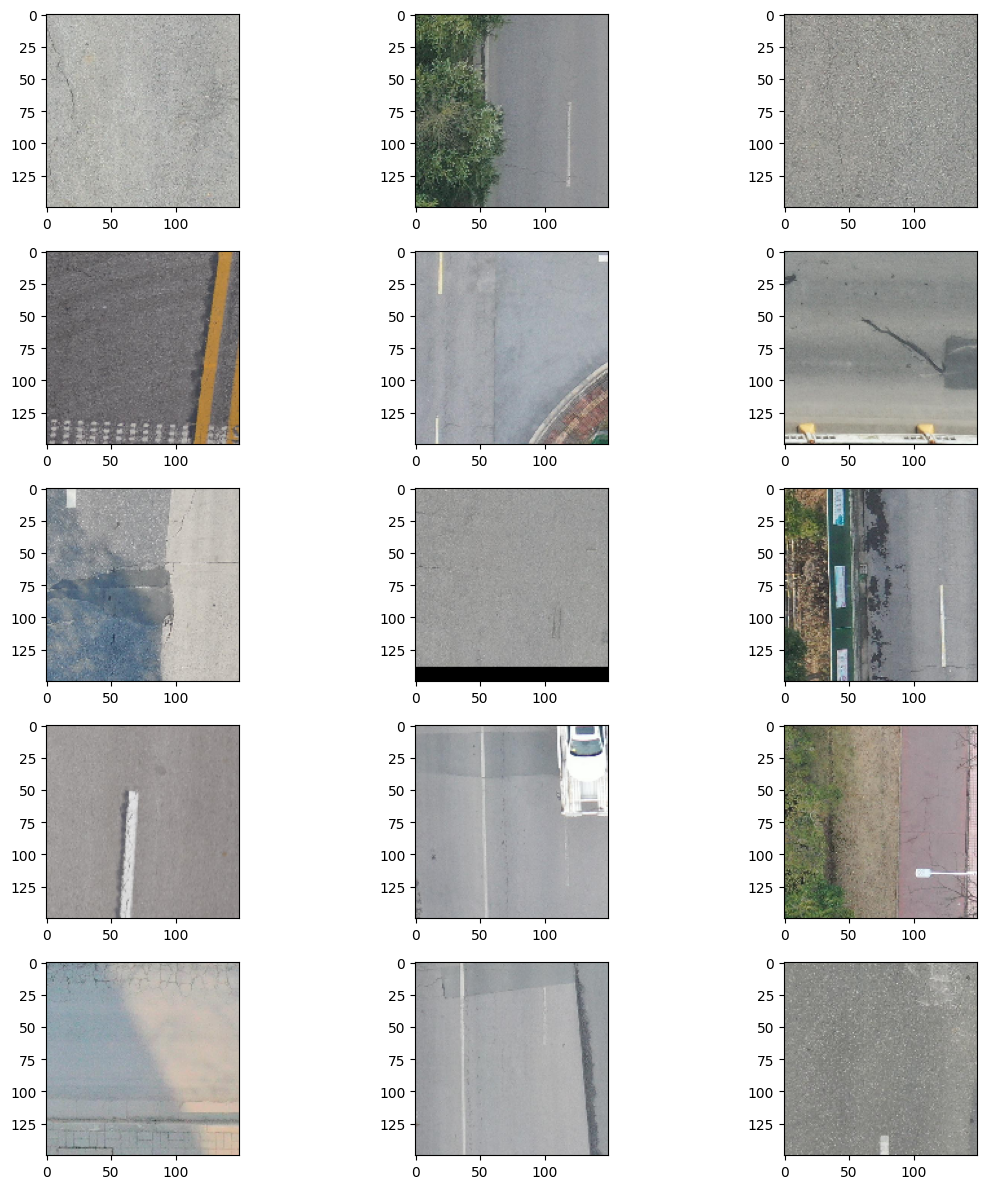

In [13]:
datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(
        'UAPD_final',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

# Plotting the images
plt.figure(figsize=(12, 12))
for i in range(0, 15):
        plt.subplot(5, 3, i+1)
        for X_batch, Y_batch in train_generator:
                image = X_batch[0]
                plt.imshow(image)
                break
plt.tight_layout()
plt.show()

In [14]:
images = []
labels = []

for i in range(0, 15):
        for X_batch, Y_batch in train_generator:
                image = X_batch[0]
                label = Y_batch[0]
                images.append(image)
                labels.append(label)
                break
        
images = np.array(images)
labels = np.array(labels)

# Create a df
df = pd.DataFrame()
df['images'] = images.tolist()
df['labels'] = labels.tolist()

In [15]:
df.head()

,images,labels
0,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",1.0
1,"[[[0.5490196347236633, 0.545098066329956, 0.52...",1.0
2,"[[[0.6117647290229797, 0.6117647290229797, 0.5...",1.0
3,"[[[0.6078431606292725, 0.6078431606292725, 0.6...",1.0
4,"[[[0.43137258291244507, 0.43137258291244507, 0...",1.0


In [16]:
# We will now split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['images'], df['labels'], test_size=0.2, random_state=42)

# We will now reshape the data
X_train = np.array(X_train.tolist())
X_test = np.array(X_test.tolist())

# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the model
model.fit(X_train, y_train, epochs=10, validation_data=[X_test, y_test])


Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.6920 - accuracy: 0.7500 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 278ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 2.0020e-07 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 342ms/step - loss: 8.0224e-07 - accuracy: 1.0000 - val_loss: 1.1122e-11 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 264ms/step - loss: 2.0073e-10 - accuracy: 1.0000 - val_loss: 3.2102e-16 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 264ms/step - loss: 3.2496e-14 - accuracy: 1.0000 - val_loss: 6.5212e-21 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 272ms/step - loss: 4.0646e-18 - accuracy: 1.0000 - val_loss: 1.2075e-25 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 249ms/step - loss: 4.7077e-22 - accuracy: 1.0000 - val_loss: 2.3339e-30 - 

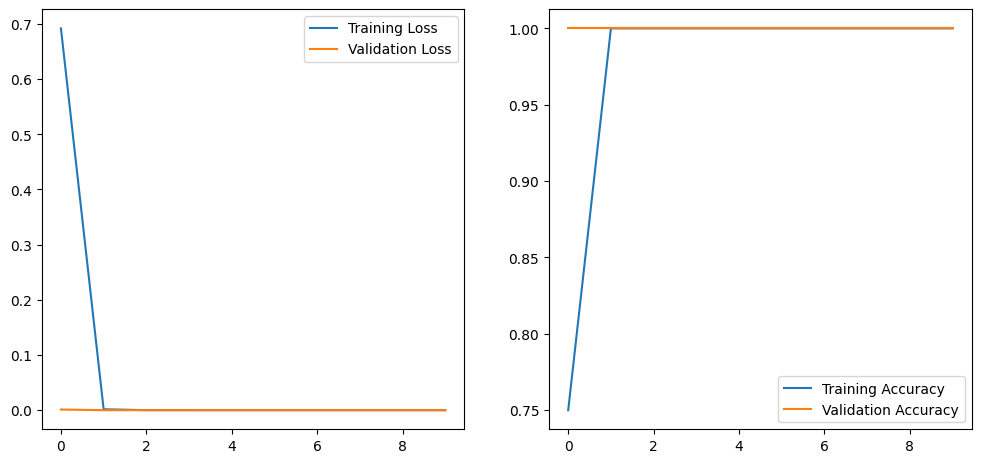

In [17]:
# Plotting the loss and accuracy
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.subplot(2, 2, 2)
plt.plot(model.history.history['accuracy'], label='Training Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

In [19]:
pd.DataFrame(model.history.history)

,loss,accuracy,val_loss,val_accuracy
0,6.919667e-01,0.75,1.172065e-03,1.0
1,1.664539e-03,1.00,2.001979e-07,1.0
2,8.022434e-07,1.00,1.112199e-11,1.0
3,2.007296e-10,1.00,3.210170e-16,1.0
4,3.249642e-14,1.00,6.521203e-21,1.0
5,4.064609e-18,1.00,1.207500e-25,1.0
6,4.707672e-22,1.00,2.333864e-30,1.0
7,5.662983e-26,1.00,5.361408e-35,1.0
8,7.958846e-30,1.00,0.000000e+00,1.0
9,1.404645e-33,1.00,0.000000e+00,1.0


<Figure size 1200x1000 with 0 Axes>

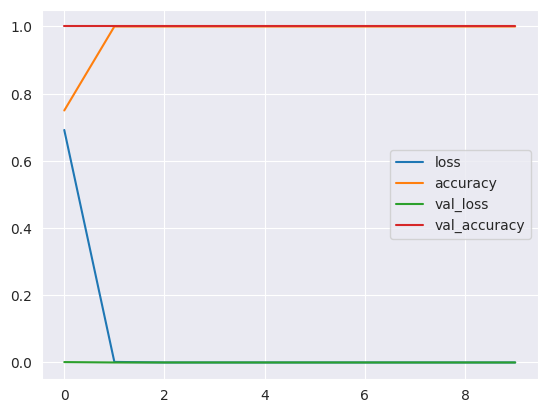

In [26]:
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
pd.DataFrame(model.history.history).plot();

In [32]:
from tensorflow.keras.preprocessing import image

def predictor(img_path):
        img = image.load_img(img_path, target_size=(150, 150))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        prediction = model.predict(img)
        if prediction == 1:
                print('This not damaged road')
        else:
                print('This is a degraded road')

predictor('test/test_5.jpeg')

1/1 [==============================] - 0s 23ms/step
This is damaged road
